In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
# Declarando Dataframe

In [64]:
df = pd.read_csv('TiktokTrendingBR.csv')

In [65]:
# Retirando colunas desnecessárias, setando index para o nome de usuário

In [66]:
df = df.drop(columns=['id','user_id', 'video_id', 'video_link', 'music_url;;','video_desc','video_time'])
df = df.drop_duplicates()
df = df.dropna()
df = df.set_index('user_name')

In [67]:
# Corrigindo o datatype das colunas

In [68]:
df['n_comments'] = pd.to_numeric(df['n_comments'], errors='coerce').astype('Int64')
df['n_plays'] = pd.to_numeric(df['n_plays'], errors='coerce').astype('Int64')
df['n_shares'] = pd.to_numeric(df['n_shares'], errors='coerce').astype('Int64')
df['n_likes'] = pd.to_numeric(df['n_likes'], errors='coerce').astype('Int64')

In [69]:
df

,video_length,n_likes,n_shares,n_comments,n_plays,music_name
user_name,,,,,,
meekotheiggy,10.0,1000000,151600,76300,12900000,оригинальный звук
sergioconstrutor,36.0,572800,184100,7311,31300000,som original
callenschaub,24.0,2400000,7771,27900,31000000,original sound
muyanxu01,8.0,119500,32400,2293,2800000,原聲
lucasranngel,28.0,870100,2326,7576,7600000,som original
...,...,...,...,...,...,...
cauabipolar,20.0,38100,12,230,251600,dc n.gabriella15
dhef_almeidaa,9.0,15800,3807,65,1100000,Runaway
status.reflexoes,14.0,15000,5653,29,312100,som original


In [70]:
# Gráfico para criadores mais curtidos
# Most liked creators 

Text(0.5, 0, '')

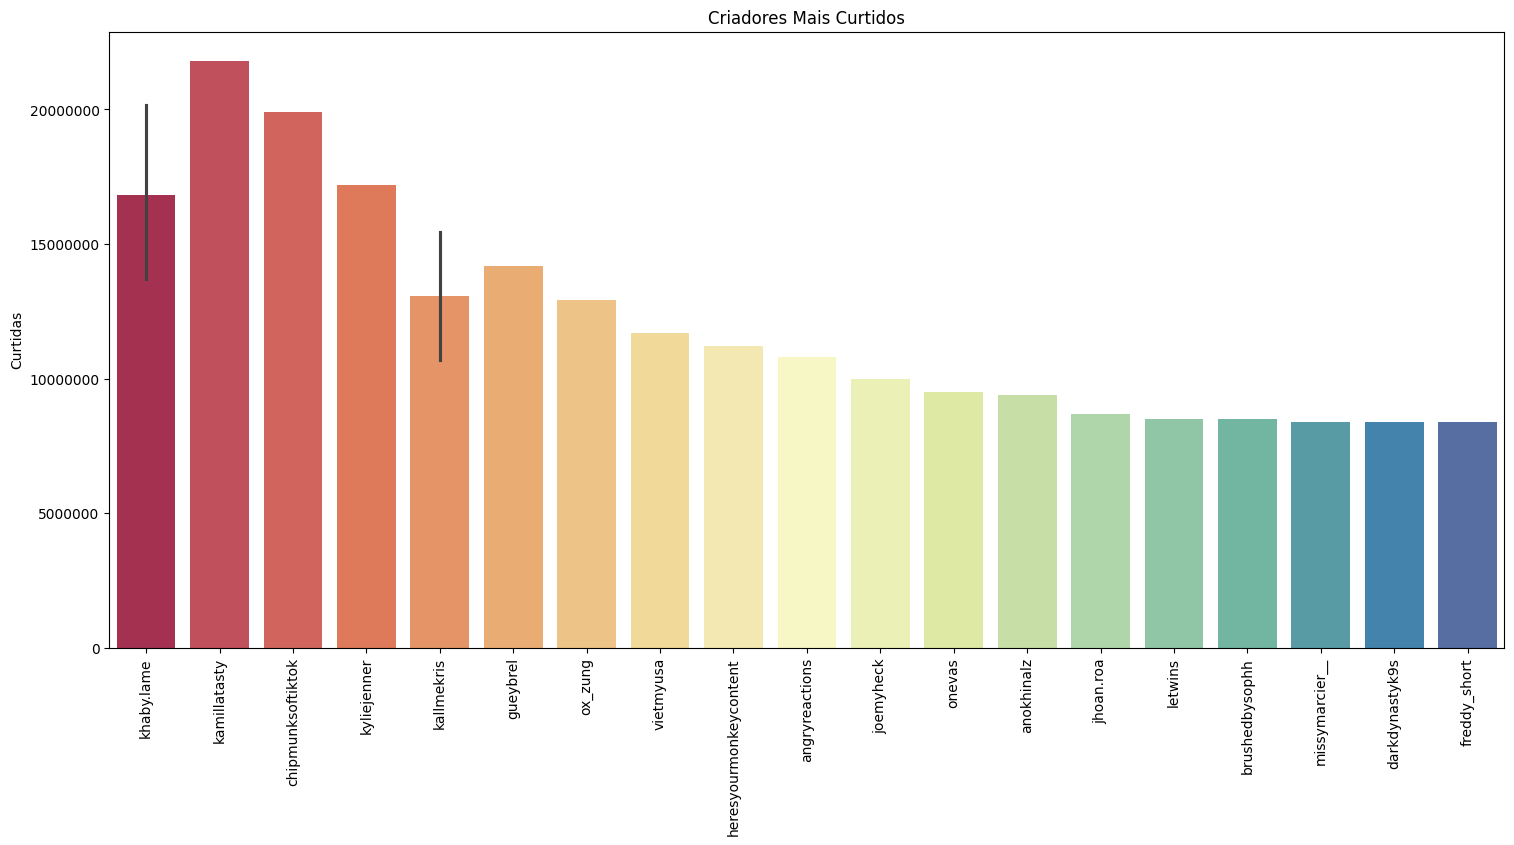

In [71]:
df = df.sort_values(by='n_likes', ascending=False)

plt.figure(figsize=(18,8))
plt.ticklabel_format(style = 'plain')
graph = sns.barplot( x = df.index[:40], y = df.n_likes[:40], hue = df.index[:40],  palette = 'Spectral', errorbar = ('ci') )
plt.xticks(rotation=90)

plt.title('Criadores Mais Curtidos')
plt.ylabel('Curtidas')
plt.xlabel('')

In [72]:
# Gráfico para criadores mais assistidos

Text(0.5, 0, '')

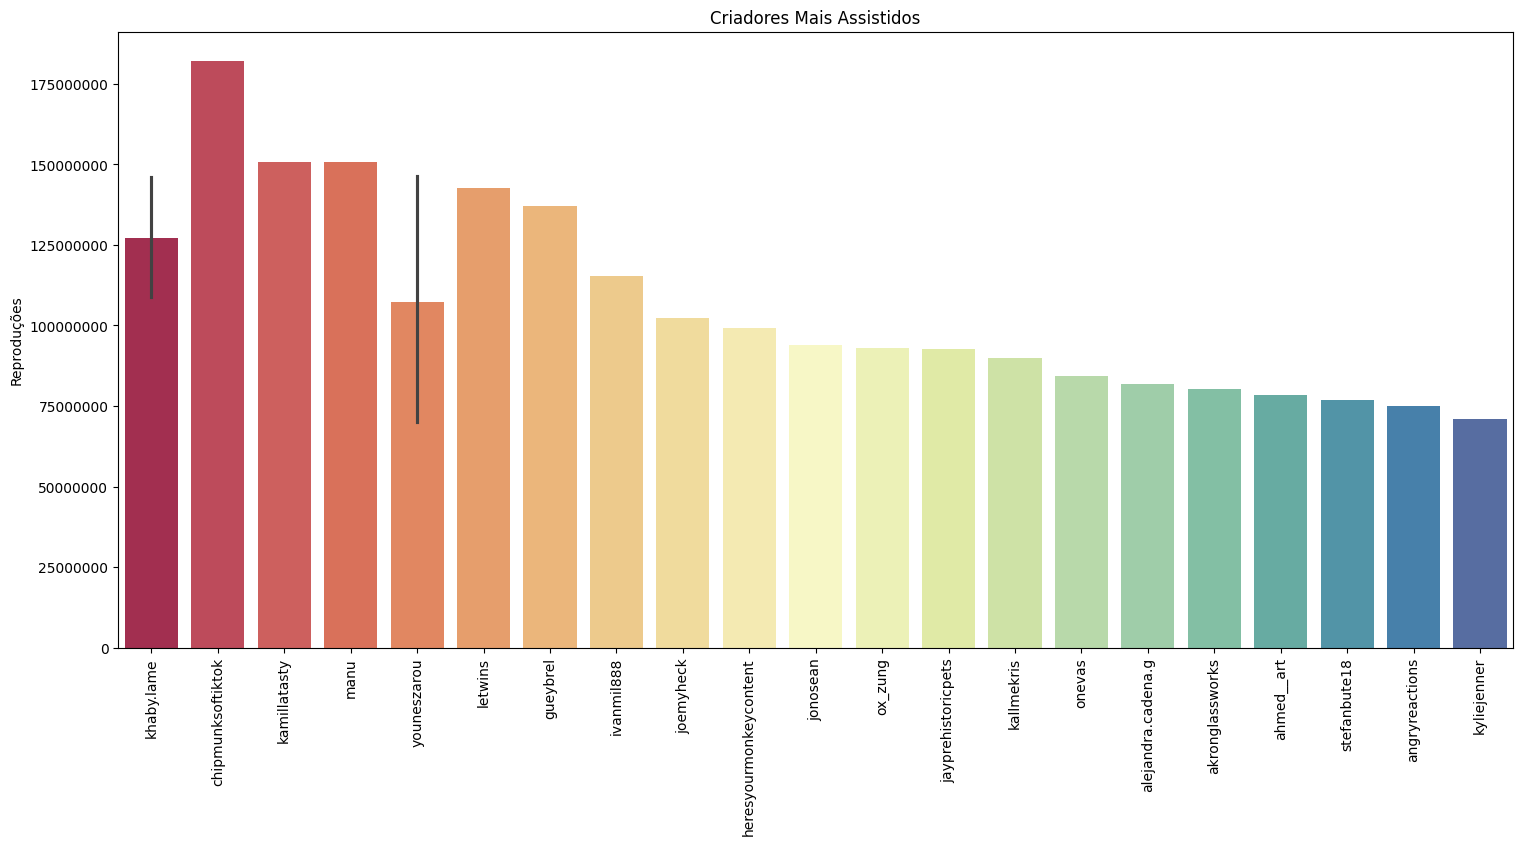

In [73]:
df = df.sort_values(by='n_plays', ascending=False)

plt.figure(figsize=(18,8))
plt.ticklabel_format(style = 'plain')
graph = sns.barplot( x = df.index[:40], y = df.n_plays[:40], hue = df.index[:40],  palette = 'Spectral')
plt.xticks(rotation=90)

plt.title('Criadores Mais Assistidos')
plt.ylabel('Reproduções')
plt.xlabel('')

In [74]:
# Gráfico de duração dos videos mais assistidos

Text(0.5, 0, '')

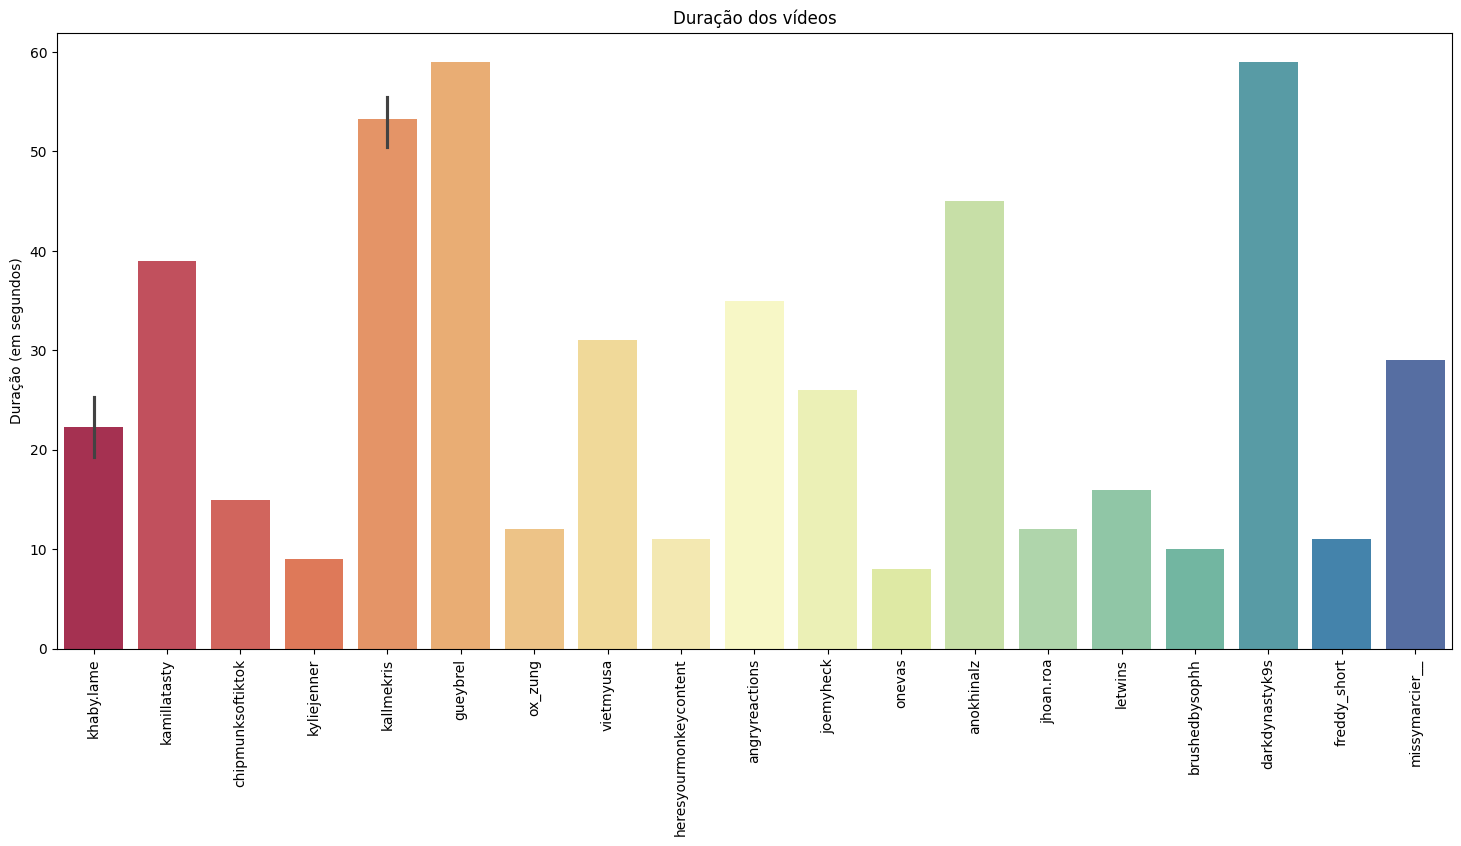

In [75]:
df = df.sort_values(by='n_likes', ascending=False)

plt.figure(figsize=(18,8))
plt.ticklabel_format(style = 'plain')
graph = sns.barplot(x = df.index[df.n_plays >= 25000000][:40], y = df.video_length[df.n_plays >= 25000000][:40], hue = df.index[df.n_plays >= 25000000][:40], legend = False, palette = 'Spectral', errorbar = ('ci'))

plt.xticks(rotation=90)

plt.title('Duração dos vídeos')
plt.ylabel('Duração (em segundos)')
plt.xlabel('')


In [ ]:
#Criando outro dataframe para análise de métricas especificas

In [76]:
df_users = df.groupby(df.index).sum()

In [77]:
df_users['share_rate'] = df_users['n_shares'] / df_users['n_plays'] * 100
df_users['engagement'] = df_users['n_likes'] / df_users['n_plays'] * 100

Mediana da Taxa de Compartilhamento: 0.96 %


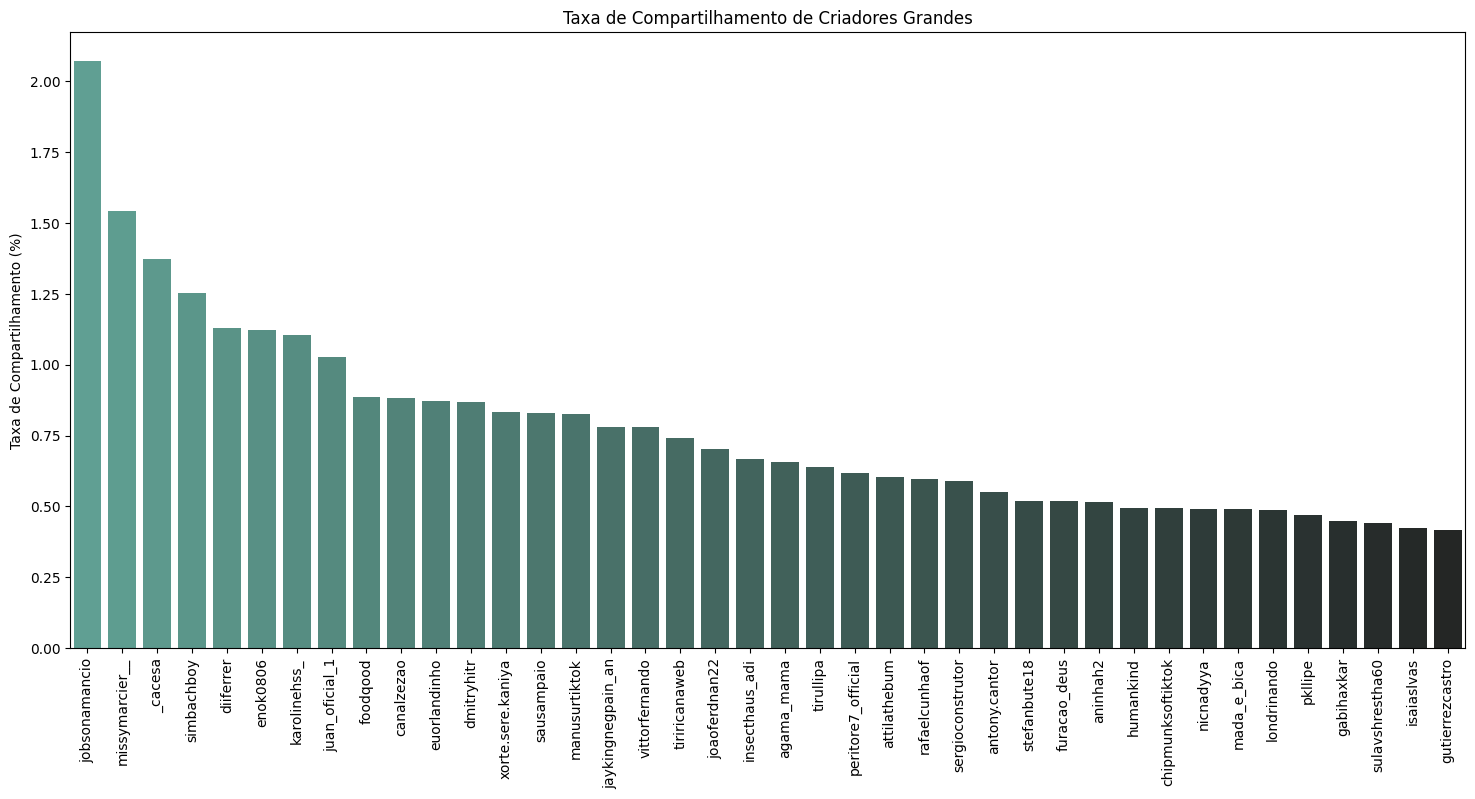

In [84]:
df_users = df_users.sort_values(by='share_rate', ascending=False)

plt.figure(figsize=(18,8))
plt.ticklabel_format(style = 'plain')
graph = sns.barplot(x = df_users.index[df_users.n_plays >= 25000000][:40], y = df_users.share_rate[df_users.n_plays >= 25000000][:40], hue = df_users.index[df_users.n_plays >= 25000000][:40], legend = False, palette = 'dark:#5A9_r', errorbar = ('ci'))

plt.xticks(rotation=90)

plt.title('Taxa de Compartilhamento de Criadores Grandes')
plt.ylabel('Taxa de Compartilhamento (%)')
plt.xlabel('')

print('Mediana da Taxa de Compartilhamento:', np.round(df_users['share_rate'].mean(), decimals=2), '%')



Mediana de Engajamento: 7.46 %


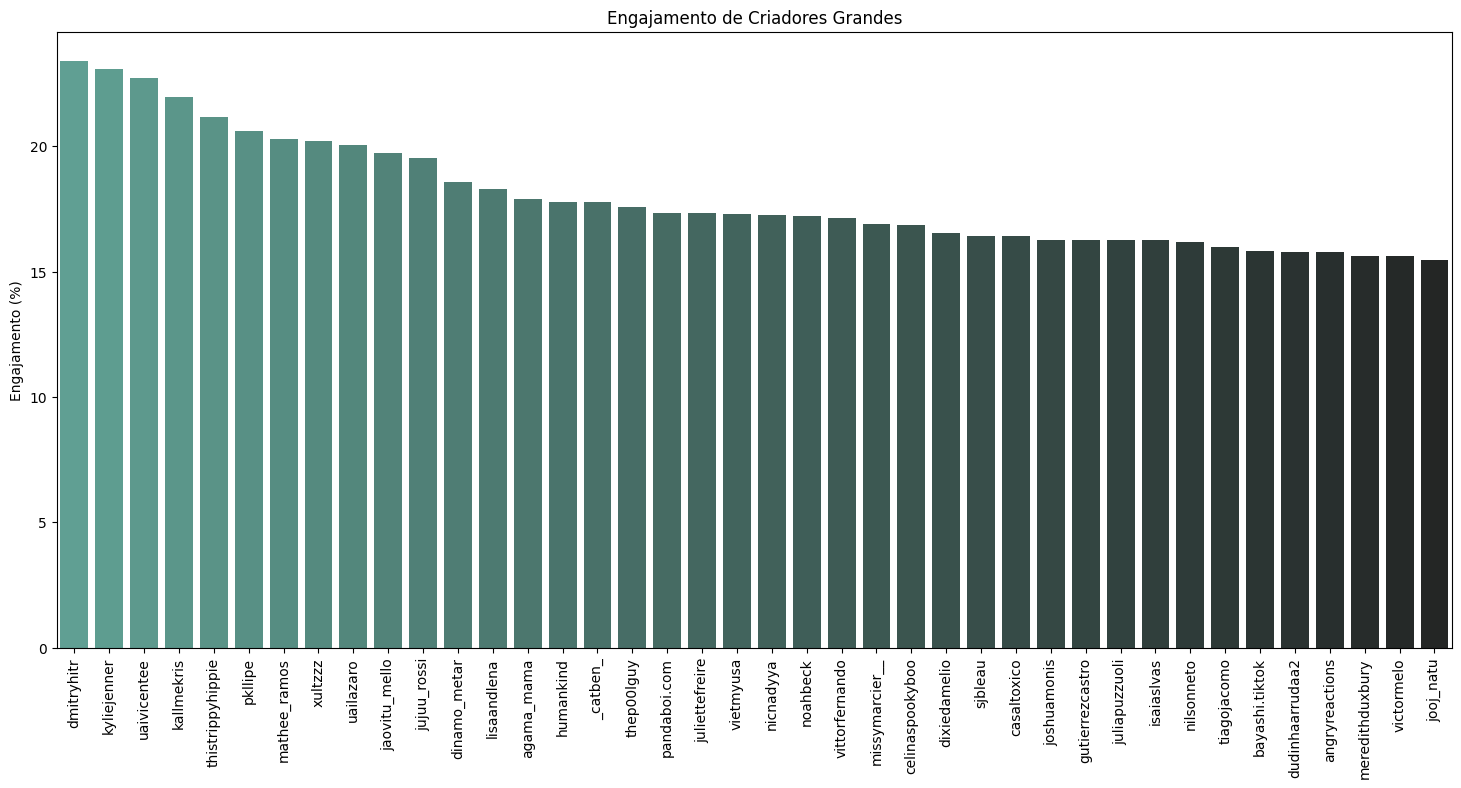

In [85]:
df_users = df_users.sort_values(by='engagement', ascending=False)

plt.figure(figsize=(18,8))
plt.ticklabel_format(style = 'plain')
graph = sns.barplot(x = df_users.index[df_users.n_plays >= 25000000][:40], y = df_users.engagement[df_users.n_plays >= 25000000][:40], hue = df_users.index[df_users.n_plays >= 25000000][:40], legend = False, palette = 'dark:#5A9_r', errorbar = ('ci'))

plt.xticks(rotation=90)

plt.title('Engajamento de Criadores Grandes')
plt.ylabel('Engajamento (%)')
plt.xlabel('')

print('Mediana de Engajamento:', np.round(df_users['engagement'].mean(), decimals=2), '%')
